# Market indicators

## Using python and pandas to spot and create indicators


In [48]:
import pandas as pd
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Understanding moving averages

First, I'm going to do a bit of research in how to calculate moving averages using tiny data sets

In [49]:
product = {'months' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}
df = pd.DataFrame(product)
df.head()

,months,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [50]:
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)
df.set_index(['months'],inplace=True)
df.head()

,demand,SMA_3
months,,
1,290,NaN
2,260,NaN
3,288,279.3
4,300,282.7
5,310,299.3


## Making sense of SMA above

First, there's a loop through the data frame. As it gets to i, it looks back 2 places to see what is there, hence the first two SMA values are not valid. For every iteration of the loop, the algorithm updates the index, 2 places after the number it's interested in. Then, it re-formats the value using a calculation that takes the last 3 numbers from the iteration and divides them by 3 (the window) to get the average.

The first SMA 3 value is 279.333. This is simply: Average = (290 + 260 + 288) / 3. 

In [51]:
#Adding a window of 4 
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)
df

,demand,SMA_3,SMA_4
months,,,
1,290,NaN,NaN
2,260,NaN,NaN
3,288,279.3,NaN
4,300,282.7,NaN
5,310,299.3,NaN
6,303,304.3,291.4
7,329,314.0,300.1
8,340,324.0,310.4
9,316,328.3,317.6


In [52]:
#Doing the same in pandas using rolling method
df['pandas_SMA_6'] = df.iloc[:,1].rolling(window=6).mean().round(2)
df


,demand,SMA_3,SMA_4,pandas_SMA_6
months,,,,
1,290,NaN,NaN,NaN
2,260,NaN,NaN,NaN
3,288,279.3,NaN,NaN
4,300,282.7,NaN,NaN
5,310,299.3,NaN,NaN
6,303,304.3,291.4,NaN
7,329,314.0,300.1,NaN
8,340,324.0,310.4,300.60
9,316,328.3,317.6,308.77


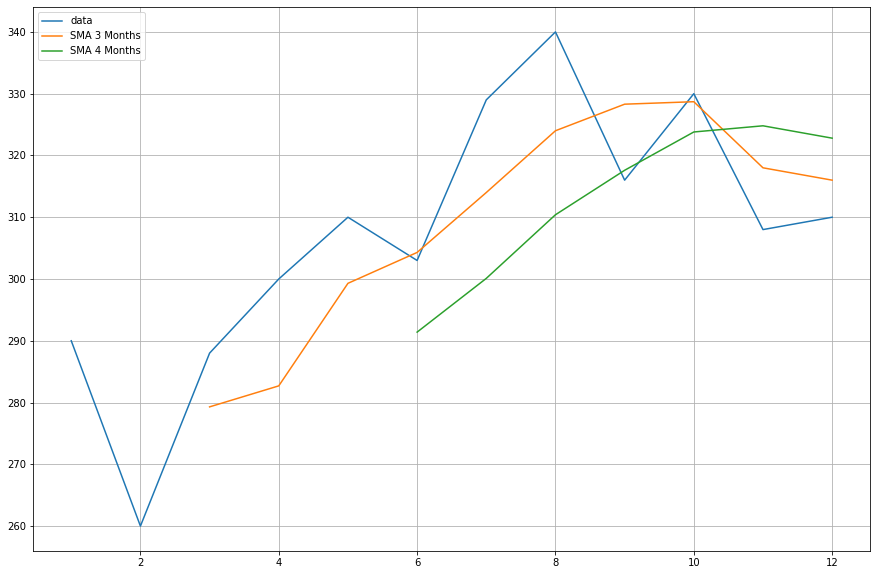

In [53]:
# Plotting a graph using matplotlib
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

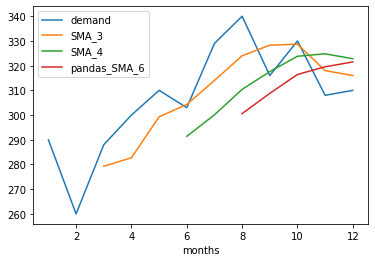

In [54]:
# Same graph but using pandas
line = df.plot.line()

## Applying moving average to Bitcoin prices over last year

In [55]:
btc_data = pd.read_csv('BTC_USD_2020-04-26_2021-04-25-CoinDesk (1).csv')
btc_df = pd.DataFrame(btc_data)
btc_df.set_index(['Date'],inplace=True)
btc_df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2020-04-26,BTC,7542.303401,7497.859881,7702.018980,7445.685898
2020-04-27,BTC,7624.853786,7542.303101,7707.594271,7503.770143
2020-04-28,BTC,7776.507543,7624.854338,7798.276656,7621.487082
2020-04-29,BTC,7761.758784,7788.574229,7793.636018,7677.178774
2020-04-30,BTC,8773.106488,7761.758619,8973.079277,7725.542654
...,...,...,...,...,...
2021-04-21,BTC,56608.769748,55723.227263,57121.943902,53442.851660
2021-04-22,BTC,54144.427476,56508.151244,56809.146393,53913.850515
2021-04-23,BTC,51965.059559,53830.823864,55471.076372,50500.731862


<AxesSubplot:xlabel='Date'>

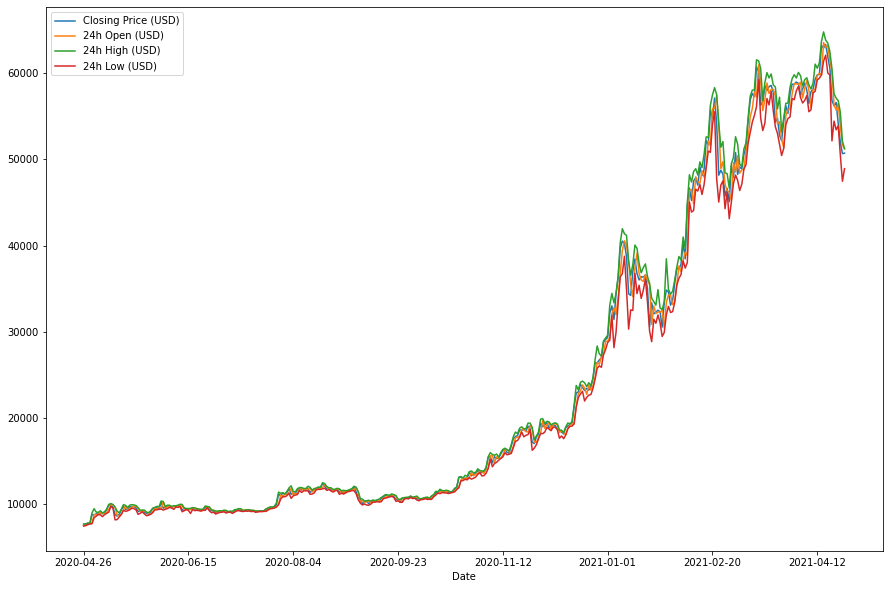

In [56]:
btc_line = btc_df.plot(figsize=(15,10))
btc_line

In [57]:
btc_df['Moving Average 20'] = btc_df.iloc[:,1].rolling(window=20).mean().round(2)

## Bitcoin to USD with 20 place moving average

<AxesSubplot:xlabel='Date'>

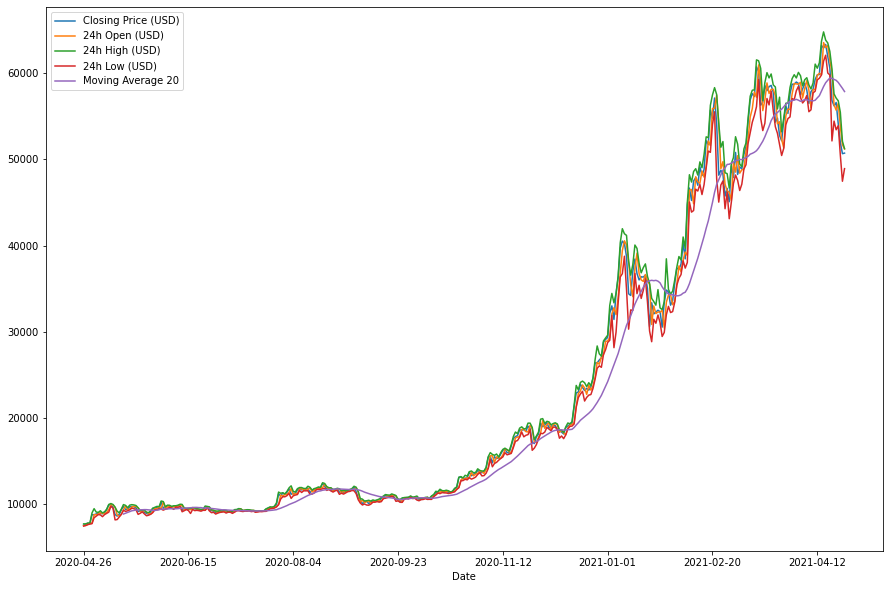

In [61]:
btc_line = btc_df.plot(figsize=(15,10))
btc_line

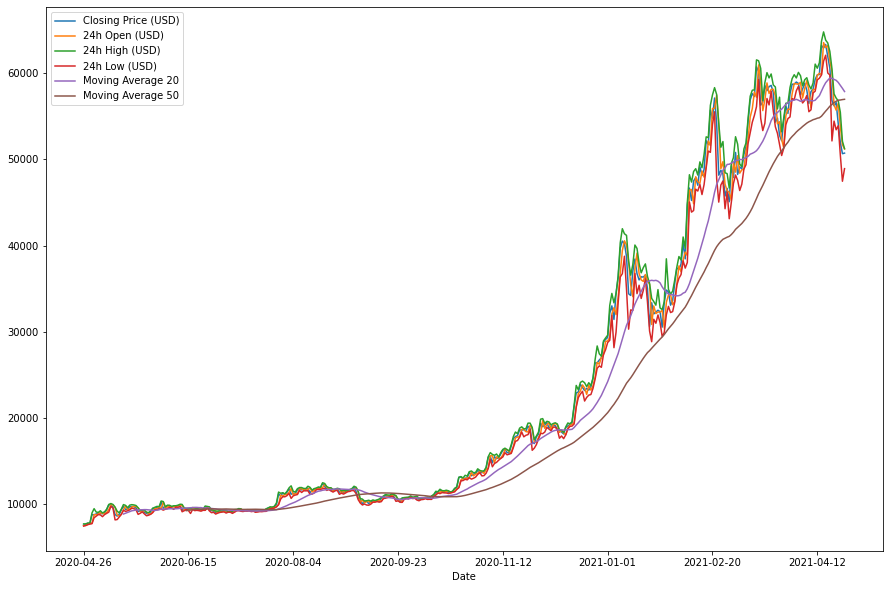

In [72]:
btc_line = btc_df.plot(figsize=(15,10))
